# Mobile Price Prediction 

Predicting the price of mobile phone based on few features
the dataset is taken from :
https://www.kaggle.com/iabhishekofficial/mobile-price-classification
by : Abhishek Sharma

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
mobile_train = pd.read_csv('train.csv')
mobile_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Features explanation:
battery_power      : self explained 
blue               : bluetooth (0 no, 1 yes)
clock_speed        : Processor clock speed
dual_sim           : Dual Sim features (0 No, 1 yes)
fc                 : fron camera (in mega pixels)
four_g             : 4g (0 No, 1 yes)
int_memory         : internal memmory (in gb)
m_dep              : Mobile depth in cm
mobile_wt          : weight in gram
n_cores            : number of cores
pc                 : ?
px_height          : pixel height
px_width           : pixel width
ram                : total Ram
sc_h               : phone dimension height
sc_w               : phone dimension width
talk_time          : total number of talk time before the battery runs out
three_g            : 3g capability (0 and 1)
touch_screen       : touch screen yes or no (0 and 1)
wifi               : wifi (0 and 1)
price_range        : price range of the phone

In [3]:
#check for dtypes
mobile_train.dtypes
#all good

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
#check for nan
mobile_train.isnull().sum()
#no nan value. this is great dataset

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

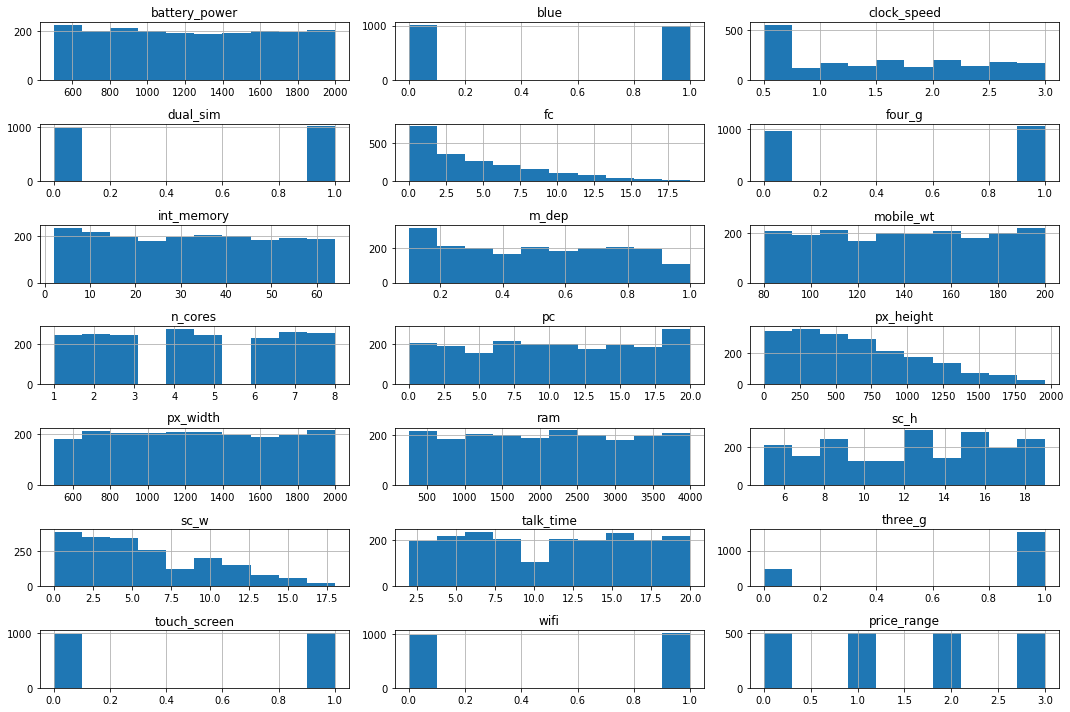

In [20]:
#check the data distribution
mobile_train.hist(layout=(7,3), figsize=(15,10))
plt.tight_layout()
plt.savefig('all_hist.png', bbox_inches = 'tight')
plt.show()
#the column with clear separation between 0 and 1 is categorical column with boolean value
#e.g. in blue (bluetooth) 0 means no, 1 means yes
#so we only look at the non categorical boolean column
#no outliers

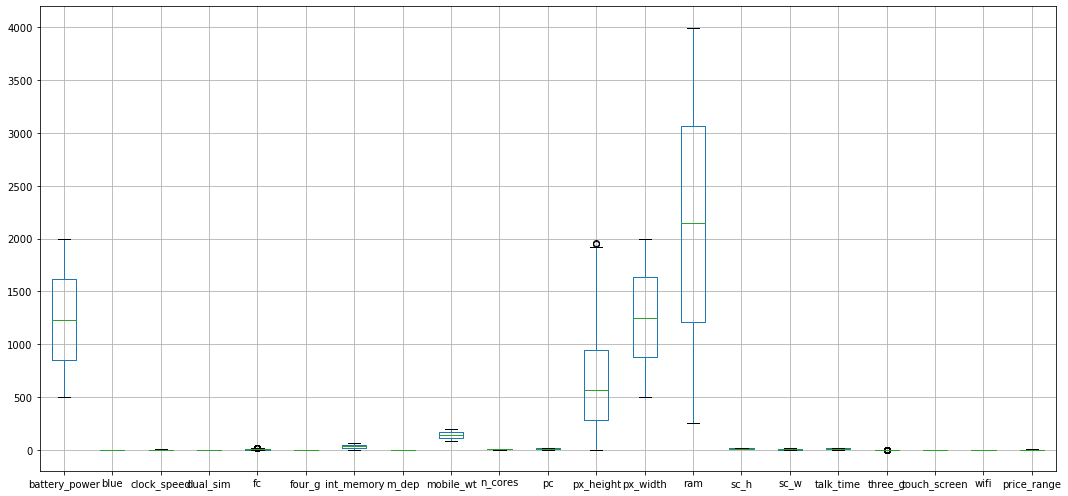

In [21]:
mobile_train.boxplot(figsize=(15, 7))
plt.tight_layout()
plt.savefig('all_boxplot.png', bbox_inches = 'tight')
plt.show()
#yep no outliers

In [7]:
#not much preprocessing can be done here
#categorical data columns are already in label encoding form
#no nan
#we can get straight to building the model
#this is a very great dataset
#split the data
y = mobile_train['price_range']
X = mobile_train.drop(['price_range'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)



In [8]:
#build our model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('model', model)])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

from sklearn.metrics import mean_squared_error
score2 = mean_squared_error(y_valid, preds)
print('MSE:', score2)

score3 = my_pipeline.score(X_valid, y_valid)
print('Score:', score3)

MAE: 0.171375
MSE: 0.07810725
Score: 0.939385961508614


In [10]:
#now predict our test dataset
mobile_test= pd.read_csv('test.csv')
mobile_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [11]:
mobile_test.isnull().sum()
#clean data as well

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [12]:
#straight to predict
test_data_final = mobile_test.drop(['id'], axis=1)
preds_test = my_pipeline.predict(test_data_final)
mobile_price_result = pd.DataFrame({'id': mobile_test['id'], 'Price_Range_Prediction': preds_test})
mobile_price_result.to_csv('Mobile_Price__Range_Prediction_Result.csv')

In [13]:
res = pd.read_csv('Mobile_Price__Range_Prediction_Result.csv', index_col=0)
res

,id,Price_Range_Prediction
0,1,2.87
1,2,2.95
2,3,2.42
3,4,2.98
4,5,1.05
...,...,...
995,996,1.62
996,997,1.13
997,998,0.60
998,999,1.96


# CROSS VALIDATION

In [14]:
#now we are doing the same thing but with cross validation, this may improve our model accuracy
#remember we repeat the step before train test split, because we are doing different thing 
#so we directly takes the training dataset before we split them
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
#better score than train test split
#the 3rd fold gives us the best score

MAE scores:
 [0.168325 0.1772   0.162325 0.170625 0.175625]


In [15]:
#now we see the score, lets perform CV manually
#this is the problem, im stuck here
kf = KFold(n_splits = 5, shuffle = True)

split_train_index = []
split_valid_index = []

for train_index, valid_index in kf.split(X):
    split_train_index.append(train_index)
    split_valid_index.append(valid_index)
    
#now we take the 3rd fold (indx starts from 0, so 2nd index (ordinal) is the 3rd fold)
training_data_index = split_train_index[2]
valid_data_index = split_train_index[2]

#form the train valid manually baase on fold
X_train = X.iloc[training_data_index]
y_train = y.iloc[training_data_index]
X_valid = X.iloc[valid_data_index]
y_valid = y.iloc[valid_data_index]


In [16]:
model2 = RandomForestRegressor(n_estimators=100, random_state=0)
my_pipeline2 = Pipeline(steps=[('model', model2)])

# Preprocessing of training data, fit model 
my_pipeline2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline2.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

from sklearn.metrics import mean_squared_error
score2 = mean_squared_error(y_valid, preds)
print('MSE:', score2)

score3 = my_pipeline2.score(X_valid, y_valid)
print('Score:', score3)
#much better score


MAE: 0.0659625
MSE: 0.011252125
Score: 0.9909681307341931


In [17]:
test_data_final2 = mobile_test.drop(['id'], axis=1)
preds_test2 = my_pipeline2.predict(test_data_final)
mobile_price_result2 = pd.DataFrame({'id': mobile_test['id'], 'Price_Range_Prediction': preds_test2})
mobile_price_result2.to_csv('Mobile_Price__Range_Prediction_Result2.csv')

In [18]:
res2 = pd.read_csv('Mobile_Price__Range_Prediction_Result2.csv', index_col=0)
res2

,id,Price_Range_Prediction
0,1,2.92
1,2,2.96
2,3,2.30
3,4,2.98
4,5,1.02
...,...,...
995,996,1.54
996,997,1.19
997,998,0.79
998,999,1.99
